In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [5]:
df = pd.read_csv('preval_modeling.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Surveillance_Year             11 non-null     int64  
 1   Prevalence_per_1000_children  11 non-null     float64
 2   1 in X                        11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [7]:
df.head()

,Surveillance_Year,Prevalence_per_1000_children,1 in X
0,2020,27.6,0.027778
1,2018,23.0,0.022727
2,2016,18.5,0.018519
3,2014,16.8,0.016949
4,2012,14.5,0.014493


In [8]:
df['Surveillance_Year']= (df['Surveillance_Year'].astype(float))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Surveillance_Year             11 non-null     float64
 1   Prevalence_per_1000_children  11 non-null     float64
 2   1 in X                        11 non-null     float64
dtypes: float64(3)
memory usage: 396.0 bytes


In [10]:
X = df[['Surveillance_Year', '1 in X']]  # feature matrix - multiple columns and rows
# feature has to be a dataframe
Y = df['Prevalence_per_1000_children'] # target vector - always 1 column, multiple rows # has to be a series

In [11]:
from sklearn.linear_model import LinearRegression # inmporting the whole thing takes a lot of memory

In [12]:
lr = LinearRegression() # MAKING PREDICTIONS

In [13]:
lr.fit(X, Y) # confirms that the model was made, m and b were found (y=mx+b)

LinearRegression()

In [14]:
lr.intercept_ #b

-155.20396789687783

In [15]:
lr.coef_ #m1, m2, m3

array([7.76036212e-02, 9.39273353e+02])

In [16]:
#can plug in numbers into the independent variables in order to make a prediction
#cannot be sure this is a good model - determine based on the prediction testing:

In [17]:
predictions = lr.predict(X)

In [18]:
predictions

array([27.64648215, 22.7470052 , 18.6388839 , 17.00961299, 14.54717563,
       14.59215384, 11.29766399,  9.00774483,  7.82787584,  6.42030444,
        6.26509719])

In [19]:
df['predicted_prevalence'] = predictions

In [20]:
df.head()

,Surveillance_Year,Prevalence_per_1000_children,1 in X,predicted_prevalence
0,2020.0,27.6,0.027778,27.646482
1,2018.0,23.0,0.022727,22.747005
2,2016.0,18.5,0.018519,18.638884
3,2014.0,16.8,0.016949,17.009613
4,2012.0,14.5,0.014493,14.547176


In [21]:
#calculate the error value / must take the absolute values to get accurate
errors = df['Prevalence_per_1000_children'] - df['predicted_prevalence']
errors

0    -0.046482
1     0.252995
2    -0.138884
3    -0.209613
4    -0.047176
5     0.107846
6     0.002336
7    -0.007745
8     0.172124
9     0.179696
10   -0.265097
dtype: float64

In [22]:
import numpy as np # must take absolute value - .abs
np.mean(np.abs(errors)) # mean absolute error

0.1299994002441847

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(df['Prevalence_per_1000_children'], df['predicted_prevalence']) 
# the closer to 1 the number is determines how accurate the model is
#if heavilty unaccurate, more variables are needed.

0.9994277832862576

In [25]:
m, b = np.polyfit(df['Surveillance_Year'], df['predicted_prevalence'], 1)  # m is slope, b is intercept

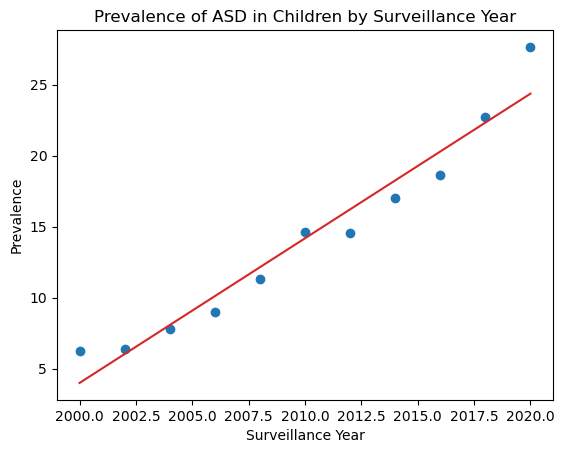

In [26]:
plt.scatter(df['Surveillance_Year'], df['predicted_prevalence'], color='tab:blue')  # Scatter plot
plt.plot(df['Surveillance_Year'], m*df['Surveillance_Year'] + b, color='tab:red')  # Regression line
plt.xlabel('Surveillance Year')
plt.ylabel('Prevalence')
plt.title('Prevalence of ASD in Children by Surveillance Year')
plt.savefig('prevalence2.png', dpi = 300)
plt.show()

In [27]:
df

,Surveillance_Year,Prevalence_per_1000_children,1 in X,predicted_prevalence
0,2020.0,27.6,0.027778,27.646482
1,2018.0,23.0,0.022727,22.747005
2,2016.0,18.5,0.018519,18.638884
3,2014.0,16.8,0.016949,17.009613
4,2012.0,14.5,0.014493,14.547176
5,2010.0,14.7,0.014706,14.592154
6,2008.0,11.3,0.011364,11.297664
7,2006.0,9.0,0.009091,9.007745
8,2004.0,8.0,0.008000,7.827876
9,2002.0,6.6,0.006667,6.420304


In [28]:
df.shape

(11, 4)

In [29]:
x = df.drop(columns = 'predicted_prevalence')   #X, y - Matrix's are usually capitalized, vectors are usually lower
y = df['predicted_prevalence']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [31]:
lm = LinearRegression() # Creating an Instance of LinearRegression model

lm.fit(x_train,y_train) # Train/fit on the trainingdata, this will give-

LinearRegression()

In [32]:
prediction = lm.predict(x_test)

In [33]:
prediction

array([14.59215384, 27.64648215,  6.42030444])

In [34]:
x.shape

(11, 3)

In [35]:
y.shape

(11,)

In [36]:
X = df["Surveillance_Year"].values.reshape(-1, 1)

# Convert the "target" column to a numpy array (reshape may not be needed for y)
Y = df["predicted_prevalence"].values.reshape(-1, 1)

In [37]:
X.shape

(11, 1)

In [38]:
Y.shape

(11, 1)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [40]:
lm.fit(X_train,Y_train)

LinearRegression()

In [41]:
y_pred = lm.predict(X_test)

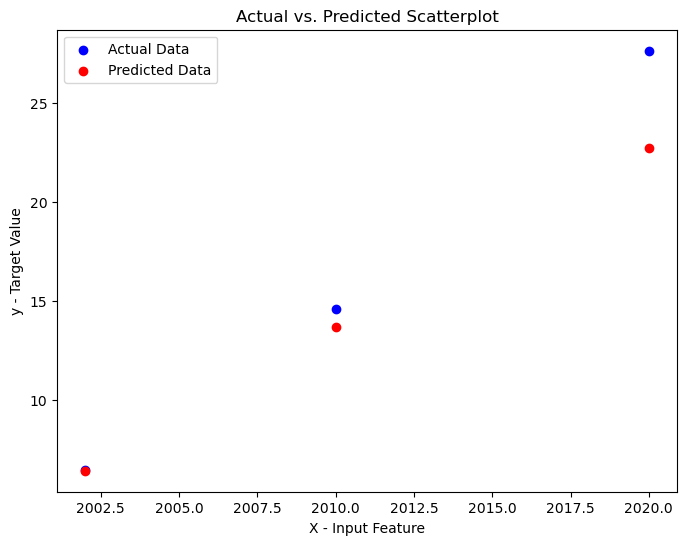

In [42]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color="blue", label="Actual Data")  # Scatter plot of actual data
plt.scatter(X_test, y_pred, color="red", label="Predicted Data")  # Scatter plot of predictions
plt.xlabel("X - Input Feature")
plt.ylabel("y - Target Value")
plt.title("Actual vs. Predicted Scatterplot")
plt.legend()
plt.show()

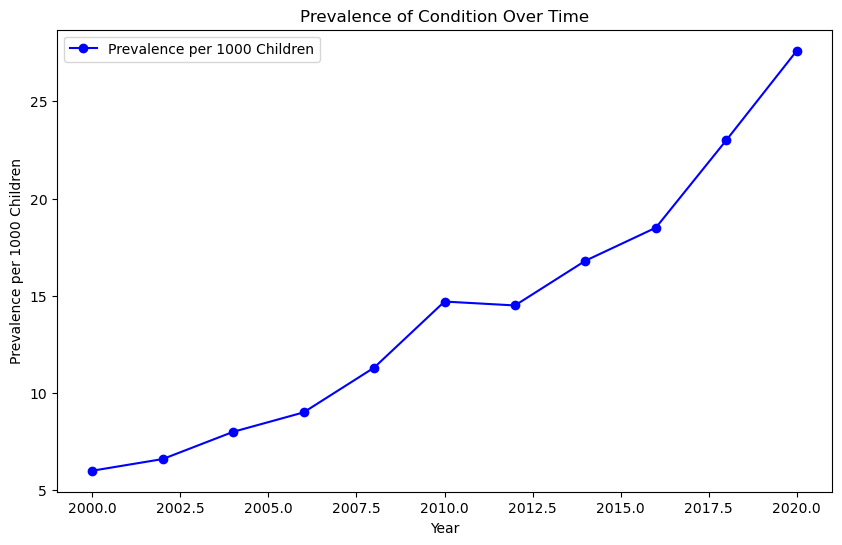

In [43]:
years = [2020, 2018, 2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000]
prevalence = [27.6, 23, 18.5, 16.8, 14.5, 14.7, 11.3, 9, 8, 6.6, 6]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years, prevalence, marker='o', color='b', label="Prevalence per 1000 Children")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Prevalence per 1000 Children")
plt.title("Prevalence of Condition Over Time")
plt.legend()
plt.show()

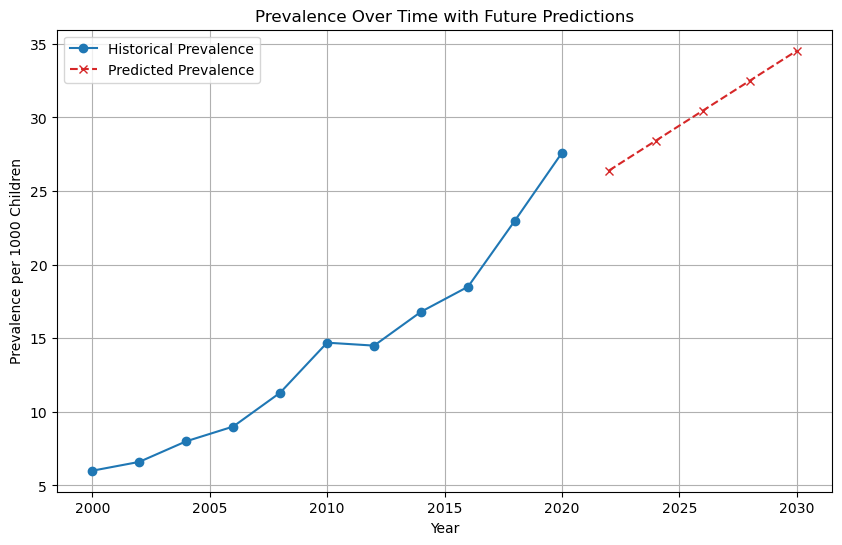

In [86]:
years = np.array([2020, 2018, 2016, 2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000]).reshape(-1, 1)
prevalence = [27.6, 23, 18.5, 16.8, 14.5, 14.7, 11.3, 9, 8, 6.6, 6]

# Train the linear regression model
model = LinearRegression()
model.fit(years, prevalence)

# Generate future years for predictions
future_years = np.array([2022, 2024, 2026, 2028, 2030]).reshape(-1, 1)
future_prevalence = model.predict(future_years)

# Combine historical and future data for plotting
all_years = np.vstack((years, future_years))
all_prevalence = np.concatenate((prevalence, future_prevalence))

# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(years, prevalence, marker='o', color='tab:blue', label="Historical Prevalence")
plt.plot(future_years, future_prevalence, marker='x', color='tab:red', linestyle='--', label="Predicted Prevalence")

# Labels and titles
plt.xlabel("Year")
plt.ylabel("Prevalence per 1000 Children")
plt.title("Prevalence Over Time with Future Predictions")
plt.legend()
plt.grid(True)
plt.savefig("prevalence_prediction.png", format="png", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>